Task 1: Load and Explore the Student Performance Dataset
The Student Performance Dataset contains student achievement data, including various attributes related to their academic and personal backgrounds. The goal is to predict whether a student needs intervention based on their performance.

You can read more about the dataset and the meaning of the columns/variables here: https://www.kaggle.com/datasets/larsen0966/student-performance-data-set

Instructions:

1. Load the Student_Performance dataset into a pandas DataFrame.

2. Display the first few rows of the dataset.

3. Get a summary of the dataset, including data types and descriptive statistics.

4. Visualize the distribution of the target variable (G3).

(Bonus) Have a look at the documentation for the dataset to understand the columns of the dataset better.

In [5]:
# 1. Load the student_Performance dataset into pandas DataFrame

import pandas as pd
df = pd.read_csv('./data/student_performance.csv', delimiter=',')

#2. display the first few rows of the dataset
print(df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


In [6]:
# 3. datatypes and descriptive statistics

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

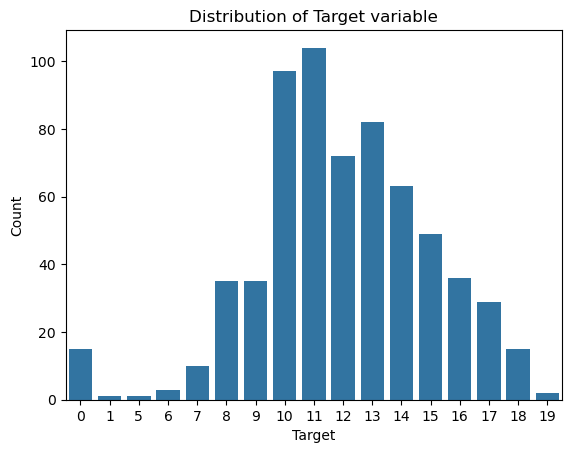

In [9]:
#4. Visualize the distribution of the target variable(G3)

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
sns.countplot(x='G3', data=df)
plt.title('Distribution of Target variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

Task 2: Prepare the target variable
First we should rename the columns G1, G2 and G3 for conveniance. Then we will create it a binary class for Pass/Fail so that we can use certain machine learning algorithms on the data.

Instructions:

1. Rename the columns G1, G2, G3 in the dataframe:
G1 ➔ period_1_grades
G2 ➔ period_2_grades
G3 ➔ final_grade
2. Create a new binary target variable passed based on the final_grade column:
If final_grade is greater than or equal to a certain threshold (e.g., 10), then passed is True. Otherwise, passed is False.
QUESTION: What percentage of students passed based on the threshold?

In [13]:
#1. Rename the columns G1, G2, G3 in the dataframe
df.rename(columns ={'G1':'period_1_grades', 
                  'G2':'period_2_grades', 'G3':'final_grade'}, inplace=True)

In [15]:
#2. create a new binary target variable passed based on the final_grade column

df['passed'] = df['final_grade'].apply(lambda x: True if x >= 10 else False)
print(df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  freetime goout  Dalc  Walc  health absences period_1_grades period_2_grades  \
0        3     4     1     1       3        4               0              11   
1        3     3     1     1       3        2               9              11   
2        3     2     2     3       3        6              12              13   
3        2     2     1     1       5        0              14              14   
4        3     2     1     2       5        0              11              13   

  final_grade passed  
0  

In [19]:
# what percentage of the people who passed.
#check the value counts
df['passed'].value_counts()

#Percentage of people who passed with threshold 10.
print ('Percentage of people who passed with threshold 10: ',549/(549+100)*100)

Percentage of people who passed with threshold 10:  84.59167950693374


Task 3: Data Preprocessing
Now that we have our target variable passed, we need to preprocess the data before applying machine learning algorithms.

Instructions:

1. Identify the numerical columns in the DataFrame df.
2. Drop the columns which are not numerical, except the "passed" column.
3. Check for missing values in the numerical data and handle them if necessary.

In [21]:
#1. Identify the numerical column
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns: ", numerical_columns)

Numerical columns:  Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'period_1_grades', 'period_2_grades', 'final_grade'],
      dtype='object')


In [34]:
#2. Drop the columns which are not numerical, expect the "passed column"

df_new_dataframe = list(numerical_columns) +['passed']
df_numeric = df[df_new_dataframe]
df_numeric.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,period_1_grades,period_2_grades,final_grade,passed
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11,11,True
1,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11,11,True
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,13,12,True
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14,14,14,True
4,16,3,3,1,2,0,4,3,2,1,2,5,0,11,13,13,True


In [39]:
#check for missing values in the numerical data

missing_values = df_numeric.isnull().sum()
print("Missing values: \n",missing_values)

Missing values: 
 age                0
Medu               0
Fedu               0
traveltime         0
studytime          0
failures           0
famrel             0
freetime           0
goout              0
Dalc               0
Walc               0
health             0
absences           0
period_1_grades    0
period_2_grades    0
final_grade        0
passed             0
dtype: int64


Task 4: Split the Dataset
We need to split the dataset into training and testing sets.

Instructions:

1.Separate features and target variable

2.Use train_test_split to split the data (e.g., 70% training, 30% testing).

In [41]:
#1. Separate features and target values

X = df_numeric.drop(columns=['passed'])
y = df_numeric['passed']

In [42]:
# 2. To spilt the data into training and testing sets 
from sklearn.model_selection import train_test_split    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 42 )

Task 5: Apply Decision Tree Classifier
Now, let's build and evaluate a Decision Tree classifier.

Instructions:

1. Initialize a Decision Tree classifier.
2. Train the model on the training data.
3. Make predictions on the test set.
4. Evaluate the model using accuracy score and confusion matrix.

In [43]:
#1. Apply decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [44]:
#2.Train the model on the training data
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
#3. Make predictions on the test set
y_pred_dt = dt.predict(X_test)

In [47]:
#4. Evaluate the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

accuracy = accuracy_score(y_test, y_pred_dt)
cm = confusion_matrix(y_test, y_pred_dt)
print(f"Accuracy : {accuracy}")
print(f"Confusion Matrix: {cm}")


Accuracy : 1.0
Confusion Matrix: [[ 26   0]
 [  0 169]]


Task 6: Apply Random Forest Classifier
Let's apply a Random Forest classifier and evaluate its performance.

Instructions:
1.Initialize a Random Forest classifier.
2.Train the model on the training data.
3.Make predictions on the test set.
4.Evaluate the model using accuracy score and confusion matrix.

In [48]:
#1. Initialize a Random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [51]:
#2. Train the model on the training data
rf.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
#3. make predictions on the test set
y_pred_rf = rf.predict(X_test)

In [54]:
#4. Evaluate the model using accuracy score anf confusion matrix

accuracy_rf = accuracy_score(y_test, y_pred_rf)
cm = confusion_matrix(y_test, y_pred_rf)

print(f" Accuracy score: { accuracy_rf}")
print(f"Confusion matrix: {cm}")

 Accuracy score: 1.0
Confusion matrix: [[ 26   0]
 [  0 169]]


Task 7: Apply Naive Bayes Classifier
Let's apply a Naive Bayes classifier and evaluate its performance.

Instructions:
1. Initialize a Naive Bayes classifier.
2. Train the model on the training data.
3. Make predictions on the test set.
4. Evaluate the model using accuracy score and confusion matrix.

In [57]:
#1.initialize Naiyes Bayes classifier.

from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()

In [58]:
#2. To train the model
nb.fit(X_train, y_train)

GaussianNB()

In [59]:
#3. make predictions on the test set
y_pred_nb = nb.predict(X_test)

In [60]:
#4. To evaluate the model using accuracy_score and confusion matrix 

accuracy_nb = accuracy_score(y_test, y_pred_nb)
cm = confusion_matrix(y_test, y_pred_nb)

print(f"Accuracy : {accuracy_nb}")
print(f"Confusion matrix : {cm}")

Accuracy : 0.9179487179487179
Confusion matrix : [[ 22   4]
 [ 12 157]]
